# Support Vector Machines for Fall detection

In this Python notebook I create different SVM models for detecting falls using 3 sensors (accelerometer, gyroscope and magnetometer). This work uses FallAllD dataset, which was created by Saleh *et al*., (2021). The model will use all three axis of all three sensors. The dataset had to be modied for having a column for fall, in which 1 represents a fall, otherwise is an ADL. For comparison, another dataset has been created, which uses a second output column. This column, ADL, will have the opposite value of Fall. 

A third and fourth dataset was created in which basic statistical features are being used. Those features are: Mean, Standard Deviation and Range. These features were extracted for each of the axis of each sensor. A fifth and sixth dataset was created using the same features, altough just considering accelerometer data, just like Saleh *et al*., (2021) did in their work.

## Creating first SVM model

### Importing libraries

This libraries will help throughout the code

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import requests

## Notification System

This funciton will be used to send a Telegram message when training is done.

In [4]:
f = open("Notification system/Telegram Token.txt")
token = f.read()

def broadcast_message(chat, message):
    for chat_to_send in chat:
        URL = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}'.format(token, chat_to_send, message)
        resp = requests.get(URL)
        print(resp.text)

### Reading frist dataframe

This is the dataframe containing one output column with raw data from all 3 sensors.

In [5]:
df = pd.read_pickle('Dataframes/Dataframe3.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SubjectID   1798 non-null   int8   
 1   Device      1798 non-null   object 
 2   ActivityID  1798 non-null   int16  
 3   TrialNo     1798 non-null   int8   
 4   Acc         1798 non-null   object 
 5   Gyr         1798 non-null   object 
 6   Mag         1798 non-null   object 
 7   Mean Acc X  1798 non-null   float64
 8   Mean Acc Y  1798 non-null   float64
 9   Mean Acc Z  1798 non-null   float64
 10  Std Acc X   1798 non-null   float64
 11  Std Acc Y   1798 non-null   float64
 12  Std Acc Z   1798 non-null   float64
 13  Rng Acc X   1798 non-null   float64
 14  Rng Acc Y   1798 non-null   float64
 15  Rng Acc Z   1798 non-null   float64
 16  Mean Gyr X  1798 non-null   float64
 17  Mean Gyr Y  1798 non-null   float64
 18  Mean Gyr Z  1798 non-null   float64
 19  Std Gyr X   1798 non-null  

In [9]:
X = df.iloc[:, 7:34]       # Defining X as Acce, Gyro and Mag data
X.info()                   # Printing X's info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mean Acc X  1798 non-null   float64
 1   Mean Acc Y  1798 non-null   float64
 2   Mean Acc Z  1798 non-null   float64
 3   Std Acc X   1798 non-null   float64
 4   Std Acc Y   1798 non-null   float64
 5   Std Acc Z   1798 non-null   float64
 6   Rng Acc X   1798 non-null   float64
 7   Rng Acc Y   1798 non-null   float64
 8   Rng Acc Z   1798 non-null   float64
 9   Mean Gyr X  1798 non-null   float64
 10  Mean Gyr Y  1798 non-null   float64
 11  Mean Gyr Z  1798 non-null   float64
 12  Std Gyr X   1798 non-null   float64
 13  Std Gyr Y   1798 non-null   float64
 14  Std Gyr Z   1798 non-null   float64
 15  Rng Gyr X   1798 non-null   float64
 16  Rng Gyr Y   1798 non-null   float64
 17  Rng Gyr Z   1798 non-null   float64
 18  Mean Mag X  1798 non-null   float64
 19  Mean Mag Y  1798 non-null  

In [8]:
y = df['Fall']          # Defining y as Fall column, this means setting y to our output.
y.tail()                # y is a Series object

1793    1
1794    1
1795    1
1796    1
1797    1
Name: Fall, dtype: int64

### Creating SVM Model 1

Creating a SVM model classifier with linear kernel

In [10]:
clf = SVC(kernel='linear')          # Parameter tuning is needed to get better results

### Stratified K fold

This function helps us to divide the dataset into K, where K = 10, folds. When this is done, data will be divided into different sets and used to train and test the model.

In [70]:
k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=7)      # Creating a Stratifiedd K fold object
for train_index, test_index in k_fold.split(X, y):                      # Splitting dataset into 10 fold 
    #print('TRAIN: ', train_index, 'TEST:', test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]

In [72]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [73]:
clf.score(X_test, y_test)

0.9553072625698324

In [74]:
cross_val_score(clf, X, y, cv=10)

array([0.96111111, 0.92777778, 0.89166667, 0.94428969, 0.95821727])

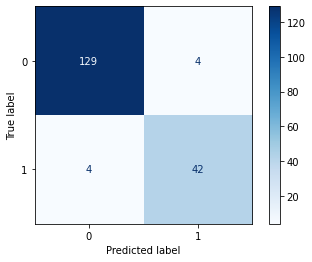

In [75]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='0.3g')

## Using train_test_split

In [19]:
print('X.shape:' + str(X.shape)) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=7, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, train_size=0.66, random_state=8, stratify=y_val)

print('X_train.shape: ' + str(X_train.shape))
print('X_val.shape: ' + str(X_val.shape))
print('X_test.shape: ' + str(X_test.shape))

X.shape:(1798, 27)
X_train.shape: (1258, 27)
X_val.shape: (356, 27)
X_test.shape: (179, 27)


In [20]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
clf.score(X_val, y_val)

0.9438202247191011

In [23]:
clf.score(X_test, y_test)

0.9608938547486033

## Using test set with 10-fold CV

In [11]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=7, stratify=y)
X.shape, X_test.shape

((1618, 27), (180, 27))

In [54]:
scores_svm = []
k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=7)      # Creating a Stratifiedd K fold object
for train_index, val_index in k_fold.split(X, y):                      # Splitting dataset into 10 fold 
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    clf.fit(X_train, y_train)
    scores_svm.append(clf.score(X_val, y_val))

broadcast_message(['1766671538'], 'Training is done!')
print(sum(scores_svm) / len(scores_svm))

{"ok":true,"result":{"message_id":59,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1633988698,"text":"Training is done!"}}
0.9486695805536385


In [12]:
cross_val_score(clf, X, y, cv=10)

array([0.9691358 , 0.9382716 , 0.93209877, 0.9382716 , 0.93209877,
       0.94444444, 0.9691358 , 0.96296296, 0.93167702, 0.97515528])

In [22]:
print(cross_val_score(clf, X, y, cv=10))        # 0.94928 accuracy
broadcast_message(['1766671538'], 'Linear Training is done!')

[0.9691358  0.9382716  0.93209877 0.9382716  0.93209877 0.94444444
 0.9691358  0.96296296 0.93167702 0.97515528]
{"ok":true,"result":{"message_id":68,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1633999380,"text":"Linear Training is done!"}}


In [13]:
clf_rbf = SVC(kernel='rbf')

scores_svm_rbf = []
k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=7)      # Creating a Stratifiedd K fold object
for train_index, val_index in k_fold.split(X, y):                      # Splitting dataset into 10 fold 
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    clf_rbf.fit(X_train, y_train)
    scores_svm_rbf.append(clf_rbf.score(X_val, y_val))

broadcast_message(['1766671538'], 'RBF Training is done!')
print('Training Accuracy: ' , sum(scores_svm_rbf) / len(scores_svm_rbf))
print('Scores for each fold: ', scores_svm_rbf)


{"ok":true,"result":{"message_id":60,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1633997429,"text":"RBF Training is done!"}}
Training Accuracy:  0.8850279886511772
Scores for each fold:  [0.8641975308641975, 0.8888888888888888, 0.9320987654320988, 0.8703703703703703, 0.8827160493827161, 0.8950617283950617, 0.8703703703703703, 0.9012345679012346, 0.8633540372670807, 0.8819875776397516]


In [18]:
print(cross_val_score(clf_rbf, X, y, cv=10).mean())
broadcast_message(['1766671538'], 'RBF Training is done!')

0.8856414385399892
{"ok":true,"result":{"message_id":65,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1633997762,"text":"RBF Training is done!"}}


In [15]:
clf_poly = SVC(kernel='poly')

scores_svm_poly = []
k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=7)      # Creating a Stratifiedd K fold object
for train_index, val_index in k_fold.split(X, y):                      # Splitting dataset into 10 fold 
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    clf_poly.fit(X_train, y_train)
    scores_svm_poly.append(clf_poly.score(X_val, y_val))

broadcast_message(['1766671538'], 'Poly Training is done!')
print('Training Accuracy: ' , sum(scores_svm_poly) / len(scores_svm_poly))
print('Scores for each fold: ', scores_svm_poly)

{"ok":true,"result":{"message_id":62,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1633997530,"text":"Poly Training is done!"}}
Training Accuracy:  0.8226209646499502
Scores for each fold:  [0.8024691358024691, 0.8333333333333334, 0.8333333333333334, 0.8518518518518519, 0.808641975308642, 0.8148148148148148, 0.8024691358024691, 0.8333333333333334, 0.8012422360248447, 0.84472049689441]


In [19]:
print(cross_val_score(clf_poly, X, y, cv=10).mean())
broadcast_message(['1766671538'], 'Poly Training is done!')

0.8213787286251055
{"ok":true,"result":{"message_id":66,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1633997789,"text":"Poly Training is done!"}}


In [57]:
y_predicted = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_predicted))

Accuracy:  0.9254658385093167


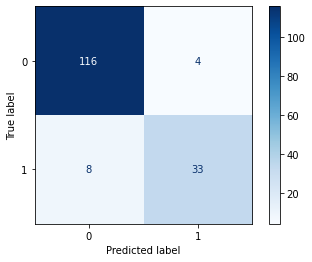

In [75]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.show()

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X= X, y= y, clf=clf, legend=2)